# Linear Regression : Salary Dataset


## Importing and Cleaning

### Importing the dataset

In [1]:
# Import pandas, numpy, seaborn, and matplotlib
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Import .csv dataset
dataset = pd.read_csv('Salary_Data.csv')

In [2]:
# Getting the information of the dataset
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [3]:
dataset.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Removing NaN datas

In [4]:
# Using .dropna to remove
dataset=dataset.dropna()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


### Plotting

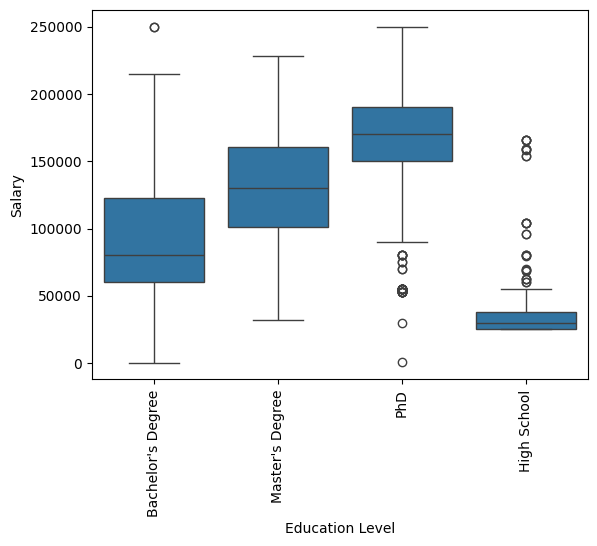

In [6]:
sns.boxplot(data = dataset, y = 'Salary', x = 'Education Level')
plt.xticks(rotation = 90);

We can see that the people that has a PhD most likely to gain the highest salary. And those with the lowest are High School as their Education Level.


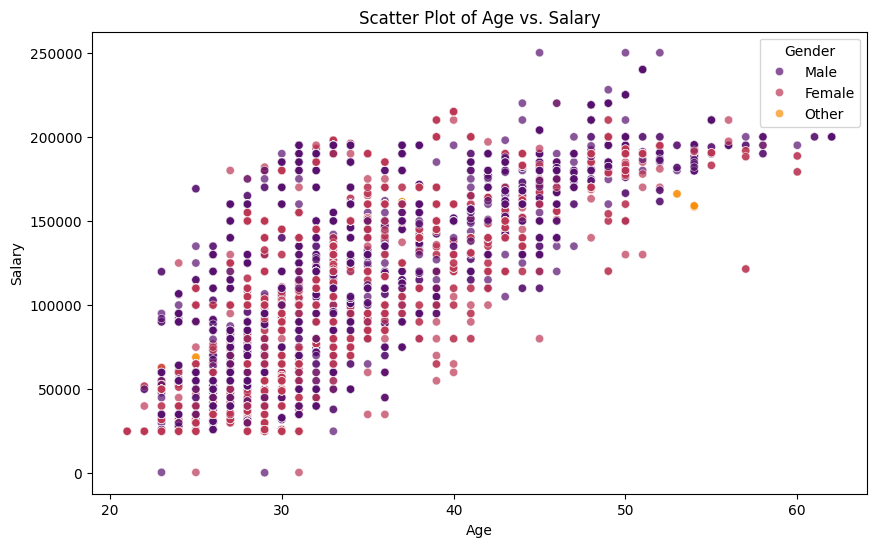

In [7]:
# Scatter Plot of Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=dataset, hue='Gender', palette='inferno', alpha=0.7)
plt.title('Scatter Plot of Age vs. Salary')
plt.show()

We can see that the higher the age, the higher their salary.

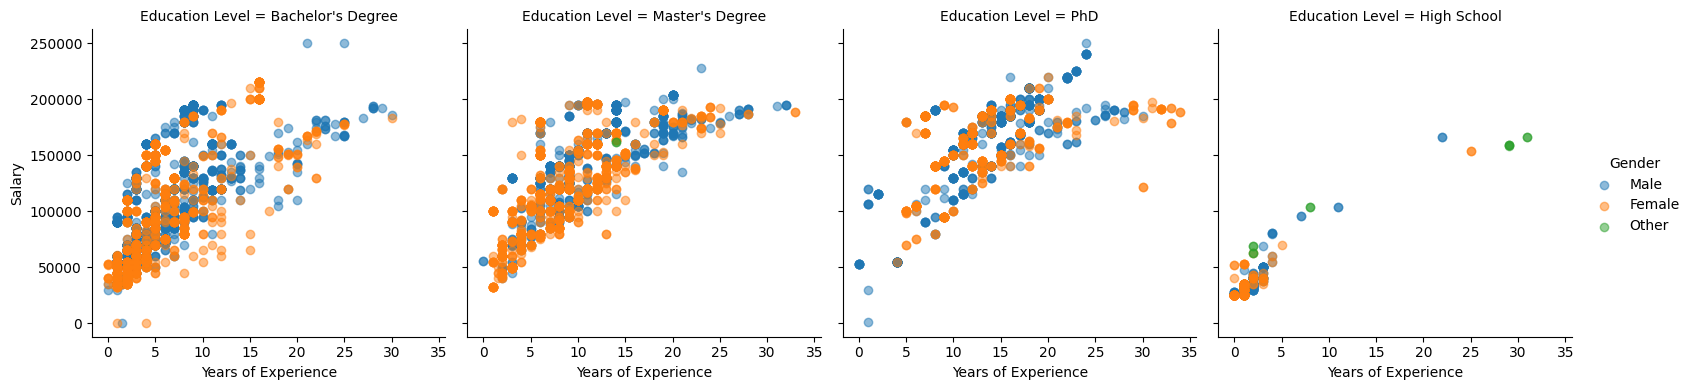

In [8]:
# Plotting the Years of Experience vs Salary based on their Education Level
g = sns.FacetGrid(dataset, col='Education Level', hue='Gender', height=4)
g.map(plt.scatter, 'Years of Experience', 'Salary', alpha=0.5)
g.add_legend()
plt.show()

We can see that the more they gain experience, the higher their salary.

### Data Cleaning

In [9]:
# Making a range of Age: 18-39 = Young Adult, 40-59 = Middle-aged Adult, and 60+ = Old Adult
dataset['Age'] = pd.cut(dataset['Age'], bins=[18, 39, 59, float('Inf')], labels=['18-39', '40-59', '60+'])

In [10]:
# Categorizing the 192 jobs into 12
job_families = {
    "Technology & Data": [
        "Software Engineer",
        "Data Analyst",
        "Software Developer",
        "Senior Engineer",
        "Software Manager",
        "Junior Developer",
        "Junior Software Developer",
        "Web Developer",
        "Full Stack Engineer",
        "Front end Developer",
        "Front End Developer",
        "Back end Developer",
        "Network Engineer",
        "IT Support",
        "IT Manager",
        "IT Support Specialist",
        "Technical Support Specialist",
        "Technical Writer",
        "Software Project Manager",
        "Senior Software Developer",
        "Senior Data Engineer",
        "Data Scientist",
        "Senior Data Scientist",
        "Junior Data Analyst",
        "Junior Data Scientist",
        "Business Intelligence Analyst",
        "Senior Data Analyst",
        "Director of Data Science",
        "Chief Data Officer",
        "Research Scientist",
        "Principal Scientist",
        "Principal Engineer",
        "Senior Software Engineer",
        "Project Engineer",
        "Strategy Consultant",
        "Business Analyst",
        "Senior Consultant",
        "Senior Business Analyst",
        "Senior Software Architect",
        "Senior IT Project Manager",
        "Senior IT Consultant",
        "Senior Quality Assurance Analyst",
        "Senior Project Engineer",
        "Software Engineer Manager",
        "Senior Product Development Manager",
        "Senior Project Manager",
        "Director of Product Management",
        "Senior IT Consultant",
        "Senior Data Engineer",
        "Senior Software Architect",
        "Software Engineer Manager",
        "Senior Data Engineer",
        "Senior Project Engineer",
        "Software Engineer Manager",
        "Senior Software Architect"
    ],
    "Sales": [
        "Sales Associate",
        "Sales Manager",
        "Sales Director",
        "Sales Executive",
        "Sales Representative",
        "Account Manager",
        "Sales Operations Manager",
        "Senior Sales Manager",
        "Director of Sales",
        "Senior Sales Representative",
        "Junior Sales Representative",
        "Junior Sales Associate",
        "Senior Account Executive",
        "Director of Sales and Marketing",
        "Director of Business Development",
        "Senior Business Development Manager",
        "Senior Account Manager",
        "Senior Account Executive",
        "Director of Sales and Marketing",
        "Director of Business Development",
        "Senior Business Development Manager"
    ],
    "Marketing": [
        "Marketing Analyst",
        "Marketing Coordinator",
        "Marketing Manager",
        "Social Media Specialist",
        "Marketing Specialist",
        "Content Marketing Manager",
        "Digital Marketing Manager",
        "Copywriter",
        "Director of Marketing",
        "Digital Content Producer",
        "Senior Marketing Analyst",
        "Senior Marketing Manager",
        "Public Relations Manager",
        "Product Marketing Manager",
        "Junior Marketing Analyst",
        "Senior Product Marketing Manager",
        "Junior Marketing Manager",
        "Junior Marketing Specialist",
        "Junior Marketing Coordinator",
        "Digital Marketing Specialist",
        "Marketing Director",
        "Social Media Manager",
        "Social Media Man"
    ],
    "Human Resources": [
        "HR Manager",
        "Recruiter",
        "HR Generalist",
        "HR Coordinator",
        "Human Resources Director",
        "Technical Recruiter",
        "Training Specialist",
        "Senior HR Manager",
        "Senior HR Generalist",
        "Senior Human Resources Manager",
        "Senior Human Resources Coordinator",
        "Director of Human Resources",
        "Human Resources Coordinator",
        "Human Resources Manager",
        "Juniour HR Generalist",
        "Juniour HR Coordinator",
        "Junior Recruiter",
        "Senior Human Resources Manager",
        "Senior Human Resources Coordinator",
        "Senior Human Resources Specialist",
        "Director of Human Capital",
        "Human Resources Coordinator",
        "Human Resources Manager",
        "Juniour HR Generalist",
        "Juniour HR Coordinator"
    ],
    "Finance / Accounting": [
        "Financial Analyst",
        "Financial Manager",
        "Accountant",
        "Junior Accountant",
        "VP of Finance",
        "Financial Advisor",
        "Senior Financial Analyst",
        "Senior Accountant",
        "Director of Finance",
        "Senior Financial Advisor",
        "Junior Financial Analyst",
        "Junior Financial Advisor",
        "Senior Financial Manager",
        "Senior Accountant"
    ],
    "Operations": [
        "Operations Manager",
        "Operations Director",
        "VP of Operations",
        "Operations Analyst",
        "Supply Chain Manager",
        "Supply Chain Analyst",
        "Senior Operations Manager",
        "Senior Operations Analyst",
        "Junior Operations Analyst",
        "Junior Operations Manager",
        "Senior Operations Coordinator",
        "Junior Operations Coordinator",
        "Delivery Driver",
        "Senior Operations Manager",
        "Senior Operations Analyst",
        "Junior Operations Coordinator",
        "Senior Operations Coordinator",
        "Junior Operations Manager",
        "Senior Operations Manager",
        "Senior Operations Analyst"
    ],
    "Customer Service / Support": [
        "Customer Service Rep",
        "Customer Service Manager",
        "Customer Service Representative",
        "Customer Success Rep",
        "Customer Success Manager",
        "Customer Support Specialist",
        "Junior Customer Support Specialist"
    ],
    "Design / Creative": [
        "Product Designer",
        "UX Designer",
        "Graphic Designer",
        "UX Researcher",
        "Creative Director",
        "Junior Designer",
        "Senior Graphic Designer",
        "Senior UX Designer",
        "Junior UX Designer",
        "Junior Web Designer",
        "Senior Product Designer",
        "Junior Designer",
        "Junior Web Designer",
        "Senior Graphic Designer",
        "Senior UX Designer",
        "Junior UX Designer"
    ],
    "Research / Science": [
        "Senior Scientist",
        "Research Scientist",
        "Principal Scientist",
        "Research Director",
        "Senior Research Scientist",
        "Senior Researcher",
        "Junior Research Scientist",
        "Senior Research Scientist"
    ],
    "Administrative / Support": [
        "Administrative Assistant",
        "Office Manager",
        "Receptionist"
    ],
    "Executive": [
        "CEO",
        "Chief Technology Officer",
        "Chief Data Officer"
    ]
}

In [11]:
# Job Family
def job_transformer(job):
    global job_families
    for family, title in job_families.items():
        if job in title:
            return family

In [12]:
#Applying
dataset['Job Title'] = dataset['Job Title'].apply(job_transformer)

In [13]:
dataset['Job Title'].unique()

array(['Technology & Data', None, 'Sales', 'Marketing',
       'Research / Science', 'Human Resources', 'Finance / Accounting',
       'Customer Service / Support', 'Operations', 'Design / Creative',
       'Executive', 'Administrative / Support'], dtype=object)

In [14]:
# Using LabelEncoder and .map to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset['Age'] = dataset['Age'].map({'18-39':0,'40-59':1,'60+':2})
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Education Level'] = dataset['Education Level'].map({"High School":0, "Bachelor's Degree":1, "Master's Degree":2, "PhD":3})
dataset['Job Title'] = label_encoder.fit_transform(dataset['Job Title'])

# Age: 
    # '18-39' = 0
    # '40-59' = 1
    # '60+' = 2

# Gender:
    # "Female" = 0
    # "Male" = 1
    # "Other" = 2

# Education Level:
    # "High School" = 0
    # "Bachelor's Degree" = 1
    # "Master's Degree" = 2
    # "PhD" = 3


Job Titles : Encoded

In [15]:
for job, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{job}: {encoded}")

Administrative / Support: 0
Customer Service / Support: 1
Design / Creative: 2
Executive: 3
Finance / Accounting: 4
Human Resources: 5
Marketing: 6
Operations: 7
Research / Science: 8
Sales: 9
Technology & Data: 10
None: 11


In [16]:
dataset
# Result:

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,1,1,10,5.0,90000.0
1,0,0,2,10,3.0,65000.0
2,1,1,3,11,15.0,150000.0
3,0,0,1,9,7.0,60000.0
4,1,1,2,11,20.0,200000.0
...,...,...,...,...,...,...
6699,1,0,3,6,20.0,200000.0
6700,0,1,0,9,3.0,50000.0
6701,0,0,1,4,4.0,55000.0
6702,1,1,2,6,14.0,140000.0


### Getting Inputs and Outputs

In [17]:
X = dataset.iloc[:,:-1].values
X

array([[ 0.,  1.,  1., 10.,  5.],
       [ 0.,  0.,  2., 10.,  3.],
       [ 1.,  1.,  3., 11., 15.],
       ...,
       [ 0.,  0.,  1.,  4.,  4.],
       [ 1.,  1.,  2.,  6., 14.],
       [ 0.,  0.,  0.,  9.,  1.]])

In [18]:
y = dataset.iloc[:,-1].values
y

array([ 90000.,  65000., 150000., ...,  55000., 140000.,  35000.])

### Creating the Training Set and the Test Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [20]:
X_train

array([[ 0.,  1.,  2.,  5., 10.],
       [ 0.,  0.,  2., 10., 10.],
       [ 0.,  0.,  3.,  8., 12.],
       ...,
       [ 0.,  1.,  1., 11.,  1.],
       [ 0.,  1.,  1., 11.,  1.],
       [ 0.,  0.,  1., 10.,  2.]])

In [21]:
X_test

array([[ 0.,  1.,  2., 10.,  9.],
       [ 0.,  0.,  2., 10.,  4.],
       [ 0.,  0.,  2., 10.,  1.],
       ...,
       [ 0.,  0.,  3.,  6.,  6.],
       [ 0.,  0.,  1.,  0., 10.],
       [ 0.,  1.,  1., 10.,  3.]])

In [22]:
y_train

array([105000., 155000., 175000., ...,  55000.,  55000., 110000.])

In [23]:
y_test

array([150000.,  75969., 100000., ..., 105000.,  55000.,  60000.])

### Building the model

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model

In [25]:
model.fit(X_train, y_train)

LinearRegression()

### Inference

In [26]:
y_pred = model.predict(X_test)
y_pred

array([138089.455427  , 100274.60582695,  79227.59980625, ...,
       114853.48795355,  94723.40295006,  81991.42142361])

In [27]:
y_test

array([150000.,  75969., 100000., ..., 105000.,  55000.,  60000.])

#### Making the prediction of a single data point with Age, Gender, Education Level, Job Title, Years of Experience

In [33]:
dataset.iloc[0]

Age                        0.0
Gender                     1.0
Education Level            1.0
Job Title                 10.0
Years of Experience        5.0
Salary                 90000.0
Name: 0, dtype: float64

In [34]:
model.predict([[0,1,1,10,5]])

array([96022.75877075])

### R-Squared

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7319930095319442

### Adjusted R-Squared

In [30]:
k = X_test.shape[1]
k

5

In [31]:
n = X_test.shape[0]
n

1340

In [32]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.7309884855796651